In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os # Import the os module

target_folder = "/content/drive/MyDrive/DATASET" # Define the target_folder variable

if os.path.exists(target_folder):
    print(f"Accessing folder:{target_folder}\nContents:")
    files = os.listdir(target_folder)
    for file in files:
        print(f"-{file}")
else:
    print(f"Folder '{target_folder}' does not exist.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accessing folder:/content/drive/MyDrive/DATASET
Contents:
-puffy eyes
-clearskin
-wrinkles
-dark spots


In [ ]:
image_size =(224,224)
batch_size = 32
data_dir = "/content/drive/MyDrive/DATASET"
train_ds =keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)
val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)
Class_names = train_ds.class_names
print("Classes:",Class_names)

Found 1206 files belonging to 4 classes.
Using 965 files for training.
Found 1206 files belonging to 4 classes.
Using 241 files for validation.
Classes: ['clearskin', 'dark spots', 'puffy eyes', 'wrinkles']


In [ ]:
image_batch, labels_batch = next(iter(train_ds))
print("Image batch shape:",image_batch.shape)
print("label batch shape:", labels_batch.shape)
print("Example one-hot label:", labels_batch[0].numpy())

Image batch shape: (32, 224, 224, 3)
label batch shape: (32, 4)
Example one-hot label: [0. 1. 0. 0.]


In [ ]:
normalization_layer = layers.Rescaling(1./255)
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]

)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE


def prepare_train_ds(ds):
  ds = ds.shuffle(1000)
  ds = ds.map(
      lambda x,y:(normalization_layer(data_augmentation(x, training=True)),y),
      num_parallel_calls=AUTOTUNE
  )
  return ds.prefetch(AUTOTUNE)


def prepare_val_ds(ds):
  ds = ds.map(
      lambda x,y:(normalization_layer(x),y),
      num_parallel_calls=AUTOTUNE
  )
  return ds.prefetch(AUTOTUNE)

  train_ds = prepare_train_ds(train_ds)
  val_ds_prep = prepare_val_ds(val_ds)


  print("Prepared train & validation datsets.")

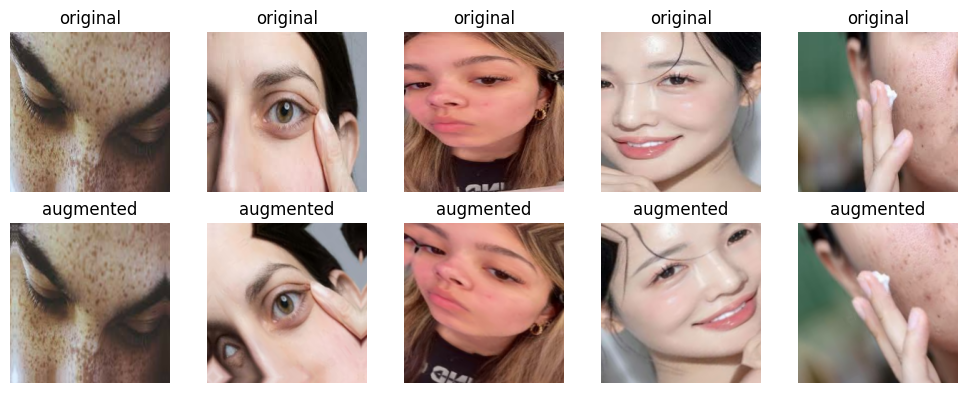

In [ ]:
images_batch,labels_batch = next(iter(train_ds))
augmented_images = normalization_layer(data_augmentation(images_batch, training=True))
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(images_batch[i].numpy().astype("uint8"))
    plt.title("original")
    plt.axis("off")
    plt.subplot(2,5,i+6)
    plt.imshow(augmented_images[i].numpy())
    plt.title("augmented")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

class_names = train_ds.class_names
print("Classes:",class_names)

def get_label_counts(dataset):
  counts = Counter()
  for _, labels in dataset:
    indices = np.argmax(labels.numpy(), axis=1)
    counts.update(indices.tolist())
    return{class_names[i]:counts[i] for i  in counts}
print("Train class counts:",get_label_counts(train_ds))
print("Validation class counts:",get_label_counts(val_ds))

Classes: ['clearskin', 'dark spots', 'puffy eyes', 'wrinkles']
Train class counts: {'clearskin': 8, 'wrinkles': 7, 'dark spots': 9, 'puffy eyes': 8}
Validation class counts: {'dark spots': 8, 'clearskin': 7, 'wrinkles': 14, 'puffy eyes': 3}


In [ ]:
input_shape = (224,224,3)
num_classes = len(train_ds.class_names)
print("Input shape:",input_shape)
print("Number of classes:",num_classes)
print("Classes:",train_ds.class_names)

Input shape: (224, 224, 3)
Number of classes: 4
Classes: ['clearskin', 'dark spots', 'puffy eyes', 'wrinkles']


In [ ]:
import os
from PIL import Image

source_dir = r"/content/drive/MyDrive/DATASET"
dest_dir = r"/content/drive/MyDrive/DATASET_RESIZED"
os.makedirs(dest_dir, exist_ok=True)
target_size = (224, 224)
total = 0

for cls in os.listdir(source_dir):
    cls_path = os.path.join(source_dir, cls)
    if not os.path.isdir(cls_path):
        continue
    dest_cls_path = os.path.join(dest_dir, cls)
    os.makedirs(dest_cls_path, exist_ok=True)
    for img_name in os.listdir(cls_path):
        src = os.path.join(cls_path, img_name)
        dst = os.path.join(dest_cls_path, img_name)

        try:
            img = Image.open(src).convert("RGB")
            img = img.resize(target_size, Image.BILINEAR)
            img.save(dst)
            total += 1
        except Exception as e:
            print(f"Skipping: {src} due to error: {e}")
            print(f"Resized images in '{cls}'")
            print(f"\nDONE -Total images resized:{total}")
            print("Saved at:", dest_dir)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_dir =r"/content/drive/MyDrive/DATASET_RESIZED"
image_size = (224,224)
batch_size = 32

train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"

)
val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)

Found 1206 files belonging to 4 classes.
Using 965 files for training.
Found 1206 files belonging to 4 classes.
Using 241 files for validation.


In [ ]:
!pip install opencv-python

In [ ]:
import os
import cv2
import shutil

source_dir = r"/content/drive/MyDrive/DATASET"
dest_dir = r"/content/drive/MyDrive/DATASET_TOP300"

os.makedirs(dest_dir, exist_ok=True)

def image_quality_score(img_path):
  """Compute laplacian variance (sharpness score)."""
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  if img is None:
    return -1
  # Fix: Corrected cv2.CV_64F and return statement placement
  return cv2.Laplacian(img, cv2.CV_64F).var()

for class_name in os.listdir(source_dir):
  class_path = os.path.join(source_dir, class_name)
  if not os.path.isdir(class_path):
    continue

  print(f"Processing class: {class_name}")

  image_files = [
      f for f in os.listdir(class_path)
  if f.lower().endswith((".jpg",".jpeg",".png"))
  ]
  scored_images = []
  # Fix: Changed `image_file` to `image_files`
  for img_file in image_files:
    img_path = os.path.join(class_path,img_file)
    score = image_quality_score(img_path)
    scored_images.append((score, img_file))
  scored_images.sort(reverse=True, key=lambda x: x[0])
  top300 = scored_images[:300]
  new_class_path = os.path.join(dest_dir, class_name)
  os.makedirs(new_class_path, exist_ok=True)
  for score , img_file in top300:
    src_img = os.path.join(class_path, img_file)
    # Fix: Changed `dst_imp` to `dst_img`
    dst_img = os.path.join(new_class_path, img_file)
    shutil.copy(src_img, dst_img)

  print(f"Saved top {len(top300)} images for class '{class_name}'")
print("\n DONE! Top 300 high-quality images saved in:",dest_dir)

Processing class: puffy eyes
Saved top 300 images for class 'puffy eyes'
Processing class: clearskin
Saved top 300 images for class 'clearskin'
Processing class: wrinkles
Saved top 300 images for class 'wrinkles'
Processing class: dark spots
Saved top 300 images for class 'dark spots'

 DONE! Top 300 high-quality images saved in: /content/drive/MyDrive/DATASET_TOP300


In [ ]:
import os
from PIL import Image

source_dir = r"/content/drive/MyDrive/DATASET_TOP300"
dest_dir = r"/content/drive/MyDrive/DATASET_RESIZED_TOP300"

os.makedirs(dest_dir,exist_ok=True)

target_size = (224,224)
total =0

for class_name in os.listdir(source_dir):
  class_path = os.path.join(source_dir, class_name)
  if not os.path.isdir(class_path):
    continue
  # Corrected indentation for the following lines
  dest_class_path = os.path.join(dest_dir, class_name)
  os.makedirs(dest_class_path,exist_ok=True)

  images = os.listdir(class_path)
  resized_count_for_class = 0 # To count images resized per class

  for img_name in images:
    src = os.path.join(class_path, img_name)
    dst = os.path.join(dest_class_path, img_name)

    try:
      with Image.open(src) as img: # Corrected src_path to src
        img = img.convert("RGB")
        img = img.resize(target_size, Image.BILINEAR)
        img.save(dst) # Corrected dst_path to dst
      total += 1
      resized_count_for_class += 1
    except Exception as e:
      print(f"Skipping {src} due to error:{e}")

  print(f"Class '{class_name}' : resized {resized_count_for_class} images.") # Moved outside inner loop

print(f"\nDONE Total resized images:{total}") # Moved outside outer loop
print("Resized dataset folder:", dest_dir)


Class 'wrinkles' : resized 300 images.
Class 'puffy eyes' : resized 300 images.
Class 'clearskin' : resized 300 images.
Class 'dark spots' : resized 300 images.

DONE Total resized images:1200
Resized dataset folder: /content/drive/MyDrive/DATASET_RESIZED_TOP300


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_dir = r"/content/drive/MyDrive/DATASET_RESIZED_TOP300"
image_size = (224,224)
batch_size = 16

train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
)

class_names = train_ds.class_names
print("Classes:",class_names)


Found 1200 files belonging to 4 classes.
Using 960 files for training.
Found 1200 files belonging to 4 classes.
Using 240 files for validation.
Classes: ['clearskin', 'dark spots', 'puffy eyes', 'wrinkles']


In [ ]:
normalization_layer = layers.Rescaling(1./255)
data_augumentation = keras.Sequential(
    [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
layers.RandomZoom(0.1),
    ]
)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

def prepare_train_ds(ds):
  ds = ds.shuffle(500)
  ds = ds.map(
      lambda x,y:(normalization_layer(data_augumentation(x, training=True)),y),
      num_parallel_calls=AUTOTUNE
  )
  return ds.prefetch(AUTOTUNE)

def prepare_val_ds(ds):
  ds = ds.map(
      lambda x,y:(normalization_layer(x),y),
      num_parallel_calls=AUTOTUNE
  )
  return ds.prefetch(AUTOTUNE)

train_ds_prep = prepare_train_ds(train_ds)
val_ds_prep = prepare_val_ds(val_ds)

print("Preprocessed train & validation datasets are ready.")

Preprocessed train & validation datasets are ready.


In [ ]:
from collections import Counter
import numpy as np

def get_label_counts(dataset):
  counts = Counter()
  for _, labels in dataset:
    indices = np.argmax(labels.numpy(), axis=1)
    counts.update(indices.tolist())
  return {class_names[i]:counts[i] for i in counts}
print("Train class counts:", get_label_counts(train_ds))
print("validation class counts:",get_label_counts(val_ds))

Train class counts: {'clearskin': 244, 'puffy eyes': 234, 'wrinkles': 233, 'dark spots': 249}
validation class counts: {'wrinkles': 67, 'dark spots': 51, 'clearskin': 56, 'puffy eyes': 66}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/DATASET_RESIZED_TOP300"
IMG_SIZE = (224,224)
BATCH_SIZE = 16
EPOCHS = 10

In [ ]:
import os

DATASET_PATH =r"/content/drive/MyDrive/DATASET_RESIZED_TOP300"

if not os.path.exists(DATASET_PATH):
    print(f"ERROR: The directory '{DATASET_PATH}'")
    raise FileNotFoundError(f"Directory not found: {DATASET_PATH}")
else:
    print(f"Directory '{DATASET_PATH}' confirmed to exist.")

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
)

train = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)

val = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
)

num_classes = train.num_classes
print("Classes:",train.class_indices)

Directory '/content/drive/MyDrive/DATASET_RESIZED_TOP300' confirmed to exist.
Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Classes: {'clearskin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}


In [ ]:
base = EfficientNetB0(include_top=False, weights="imagenet",input_shape=(224,224,3))
base.trainable = False

x = GlobalAveragePooling2D()(base.output)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base.input, outputs=output)

loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

model.compile(
    optimizer=Adam(1e-4),
    loss=loss_fn,
    metrics=['accuracy']
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("best_val_model.h5", monitor="val_accuracy", verbose=1, save_best_only=True,
)

early = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1,
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)
callbacks = [checkpoint, early, reduce_lr]

In [ ]:
history = model.fit(train, validation_data=val, epochs=EPOCHS, callbacks=callbacks, verbose=1)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8537 - loss: 0.7001
Epoch 1: val_accuracy did not improve from 0.84167
60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8536 - loss: 0.7002 - val_accuracy: 0.8083 - val_loss: 0.7296 - learning_rate: 1.0000e-04
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8467 - loss: 0.6866
Epoch 2: val_accuracy did not improve from 0.84167
60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8469 - loss: 0.6863 - val_accuracy: 0.8250 - val_loss: 0.7313 - learning_rate: 1.0000e-04
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8891 - loss: 0.6607
Epoch 3: val_accuracy did not improve from 0.84167
60/60 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8888 - loss: 0.6609 - val_accuracy: 0.8292 - val_loss: 0.7279 - learning_rate: 1.0000e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9085 - loss: 0.6327
Epoch 4: val_accuracy did not improve from 0.84167
60/60 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_acc)+1)

In [ ]:
print("Final Training Accuracy :", train_acc[-1])
print("Final Validation Accuracy :", val_acc[-1])
print("Final Training Loss :", train_loss[-1])
print("Final Validation Loss :", val_loss[-1])

Final Training Accuracy : 0.9197916388511658
Final Validation Accuracy : 0.8291666507720947
Final Training Loss : 0.5944353938102722
Final Validation Loss : 0.7039793133735657


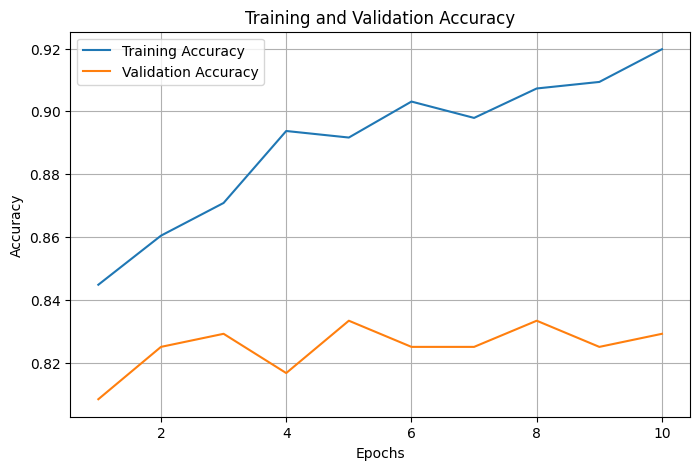

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

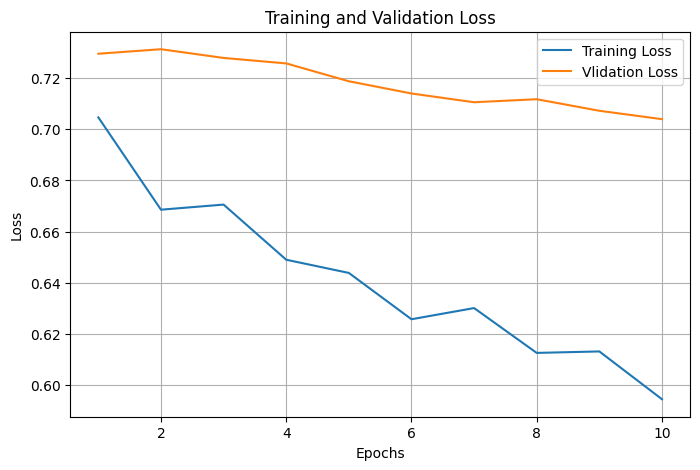

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label="Vlidation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files
files.download("best_val_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/best_val_model.h5")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.jpg to images (2).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


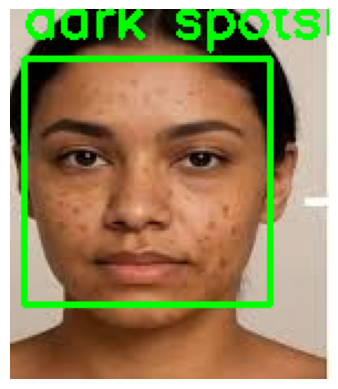

In [ ]:
import cv2
import numpy as np
from PIL import Image

Classes = ["clearskin", "dark spots", "puffy eyes", "wrinkles"]

# Get the uploaded image filename
# Assuming only one file was uploaded, or using the first one
if uploaded:
    image_filename = list(uploaded.keys())[0]
    # Read the image using OpenCV
    img = cv2.imread(image_filename)

    if img is None:
        print(f"Error: Could not load image {image_filename}")
    else:
        # Convert to grayscale for face detection
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(
            gray_img,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
        )

        if len(faces) == 0:
            print("No faces detected in the image.")
        else:
            for (x,y,w,h) in faces:
                face = img[y:y+h, x:x+w]

                face_resized = cv2.resize(face, (224,224))
                face_norm = face_resized / 255.0
                face_input = face_norm.reshape(1, 224, 224, 3)

                pred = model.predict(face_input)[0]

                predicted_label = Classes[np.argmax(pred)]
                confidence = float(np.max(pred)) * 100

                cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

                label = f"{predicted_label}({confidence:.2f}%)"

                cv2.putText(img, label, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

            # Display the result (optional, requires matplotlib for Colab)
            from matplotlib import pyplot as plt
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
else:
    print("No image was uploaded. Please upload an image first.")

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2025-12-31 02:58:57--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2025-12-31 02:58:57 (16.5 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
from google.colab import files
files.download("haarcascade_frontalface_default.xml")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>